In [1]:
import pandas as pd
import yfinance as yf
from pathlib import Path
import plotly.express as px
import plotly.io as pio

# Getting timespan to explore

In [2]:
videos_df = pd.read_csv("outputs/videoInfo.csv", usecols = ["publishedAt"])

min_date, max_date = videos_df.publishedAt.min()[:10], videos_df.publishedAt.max()[:10]
min_date, max_date

('2017-08-15', '2022-07-08')

# Download SPY Data

In [3]:
ticket_name = "SPY"

ticket = yf.Ticker(ticket_name)

data = yf.download(ticket_name, start = min_date, end = max_date).reset_index()
data.head()

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-08-15,246.979996,247.000000,246.160004,246.509995,226.019592,55242700
1,2017-08-16,247.110001,247.570007,246.449997,246.940002,226.413834,56715500
2,2017-08-17,246.240005,246.600006,243.089996,243.089996,222.883850,128490400
3,2017-08-18,242.899994,244.190002,242.199997,242.710007,222.535461,136748000
4,2017-08-21,242.639999,243.199997,241.830002,242.899994,222.709671,65469700


In [4]:
cwd = Path().absolute()
output_dir = f"{cwd}/outputs"
Path(output_dir).mkdir(parents = True, exist_ok = True)


data.to_csv(f"{output_dir}/SPY.csv", index = False)

# Plot Prices

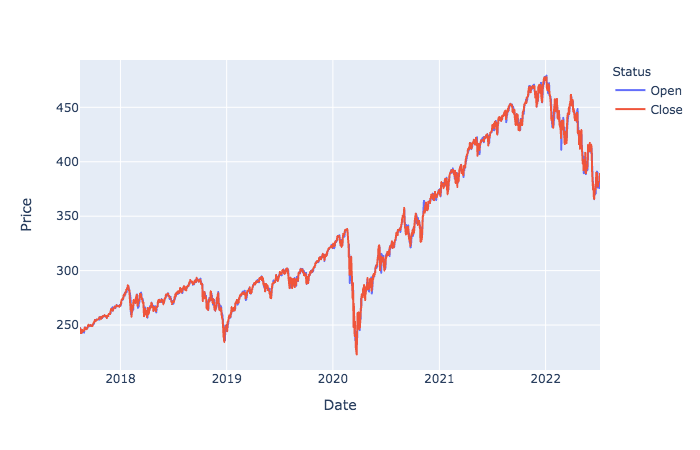

In [6]:
open_data = data[["Date", "Open"]].rename(columns = {"Open": "Price"})
open_data["Status"] = "Open"
close_data = data[["Date", "Close"]].rename(columns = {"Close": "Price"})
close_data["Status"] = "Close"

data_append = pd.concat([open_data, close_data])

fig = px.line(data_append, x = "Date", y = "Price", color = "Status")
fig.show("png")